**Time Series Handson**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/AirPassengers.csv')

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
data.shape

(144, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
data['Month']=pd.to_datetime(data['Month']) #changing the column to datetime format

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
data.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
#To fill the null values, we can use interpolate method
#data.interpolate(method='linear')
#data.interpolate(method='polynomial')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
data.set_index('Month',inplace=True)

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


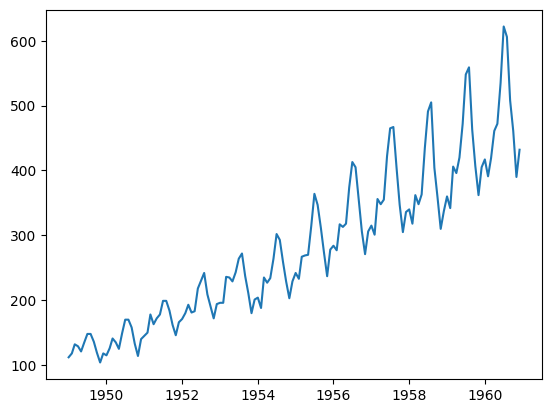

In [ ]:
plt.plot(data)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose=seasonal_decompose(data)

Figure(640x480)


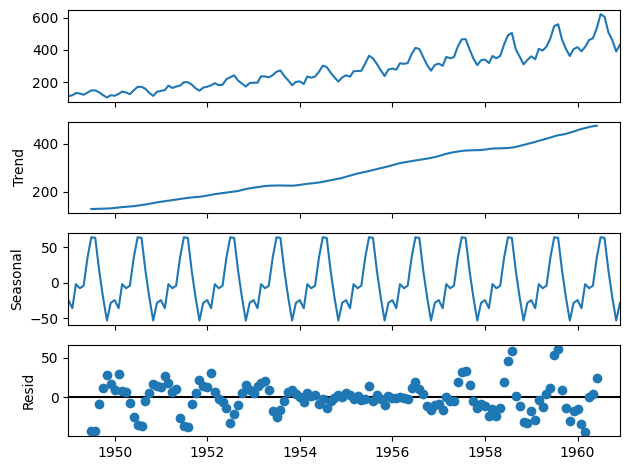

In [ ]:
print(decompose.plot())

**Stationary data** - rolling mean and rolling standard deviation should be constant or no trend & seasonality

In [ ]:
#Augmented Dicket fuller test - adfuller
#It assumes the data is non-stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

**Hypothesis**

`null hypothesis:` Data is non stationary

`Alternate hypothesis:` Data is stationary

In [ ]:
result=adfuller(data)

In [ ]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
p_val=result[1]
p_val

0.991880243437641

In [ ]:
if p_val > 0.05:
  print('Accept null hypothesis, data is non stationary')
else:
  print('Reject null hypothesis, data is stationary')

Accept null hypothesis, data is non stationary


**Converting the data into stationary**

In [ ]:
#Rolling mean
roll_mean=data.rolling(window=12).mean()
roll_std=data.rolling(window=12).std()

In [ ]:
roll_mean.head(30)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


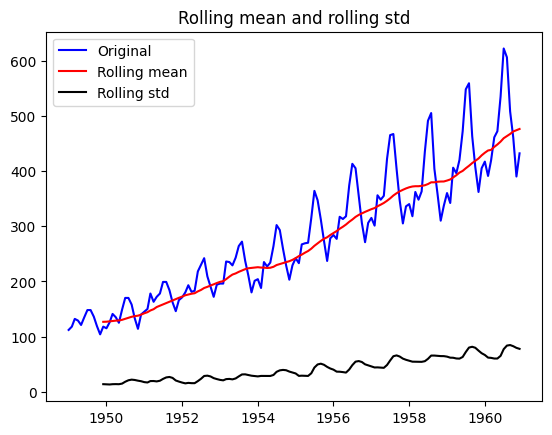

In [ ]:
plt.plot(data,color='blue',label='Original')
plt.plot(roll_mean,color='red',label='Rolling mean')
plt.plot(roll_std,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

To make the data stationary, we are applying transformation

In [ ]:
df_log=np.log(data)

In [ ]:
mean_log=df_log.rolling(window=12).mean()
std_log=df_log.rolling(window=12).std()

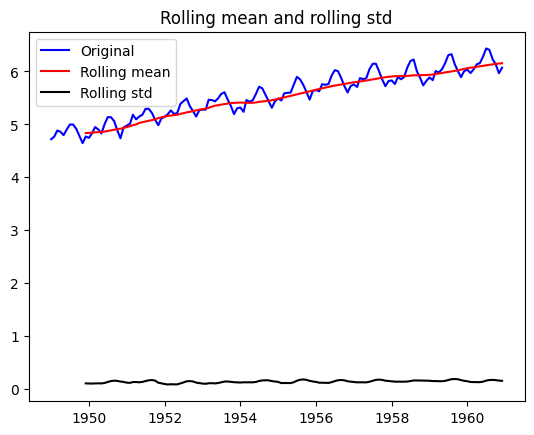

In [ ]:
plt.plot(df_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

In [ ]:
new_data=df_log-mean_log #detrending

In [ ]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

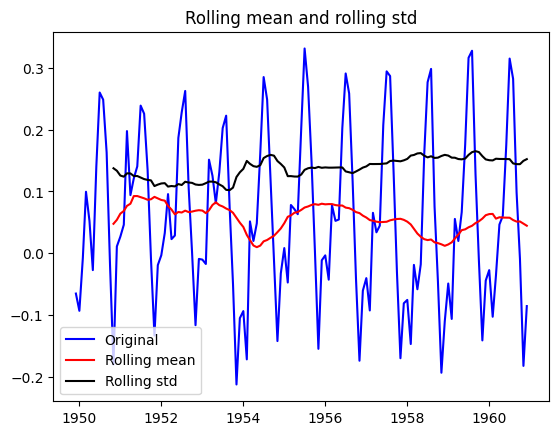

In [ ]:
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

In [ ]:
new_data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
new_data.dropna(inplace=True)

In [ ]:
result=adfuller(new_data)

In [ ]:
p_value=result[1]

In [ ]:
p_value

0.022234630001242206

In [ ]:
if p_value > 0.05:
  print('Accept null hypothesis, data is non stationary')
else:
  print('Reject null hypothesis, data is stationary')

Reject null hypothesis, data is stationary


**ARIMA** - Auto Regressive Integrated Moving Average

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
new_data

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [ ]:
train=new_data.iloc[:120,:]['#Passengers']
test=new_data.iloc[120:,:]['#Passengers']

In [ ]:
model=ARIMA(train,order=(2,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model=model.fit()

In [ ]:
new_data['predict']=model.predict(start=120,end=132) #starting and ending index of the test data

<Axes: xlabel='Month'>

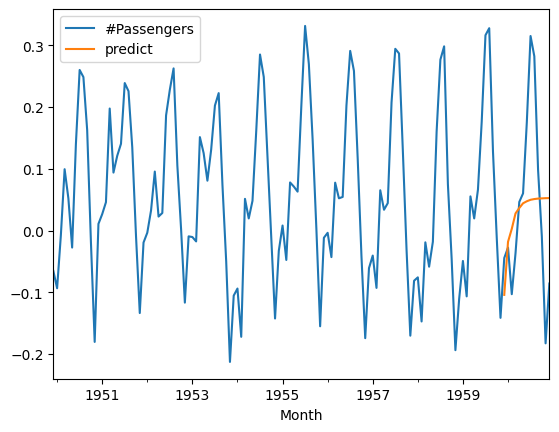

In [55]:
new_data[['#Passengers','predict']].plot()

In [ ]:
import itertools

In [56]:
p=range(8)
d=range(1,2)
q=range(8)
pdq_combination=list(itertools.product(p,d,q))
pdq_combination

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [57]:
len(pdq_combination)

64

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
rmse=[]
order1=[]
for pdq in pdq_combination:
  model=ARIMA(train,order=pdq)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
  error=np.sqrt(mean_squared_error(test,pred))
  order1.append(pdq)
  rmse.append(error)

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [60]:
results

,RMSE
"(0, 1, 0)",0.228469
"(0, 1, 1)",0.252662
"(0, 1, 2)",0.140613
"(0, 1, 3)",0.140137
"(0, 1, 4)",0.136974
...,...
"(7, 1, 3)",0.082086
"(7, 1, 4)",0.139948
"(7, 1, 5)",0.056263
"(7, 1, 6)",0.060098


In [62]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(7, 1, 7)",0.053966
"(7, 1, 5)",0.056263
"(7, 1, 6)",0.060098
"(6, 1, 6)",0.068580
"(6, 1, 7)",0.069077
...,...
"(2, 1, 0)",0.217928
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240001
"(0, 1, 1)",0.252662


In [63]:
#optimal value for pdq from itertools is (7,1,7)

In [64]:
model=ARIMA(train,order=(7,1,7))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [65]:
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

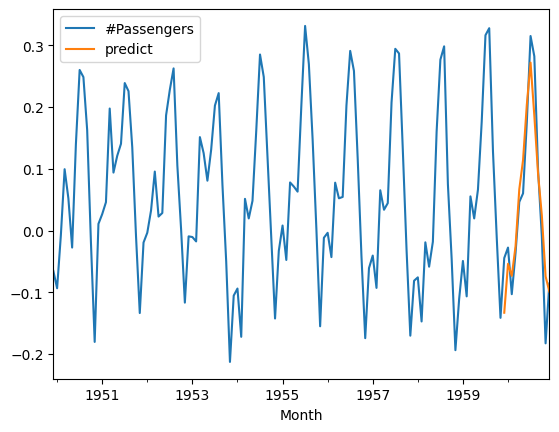

In [67]:
new_data[['#Passengers','predict']].plot()

In [68]:
#Auto arima

In [70]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00


In [73]:
new_data

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.186447
1960-09-01,0.098235,0.091856
1960-10-01,-0.009230,0.024524


In [74]:
data_new=new_data.copy()

In [77]:
data_new.drop(columns='predict',axis=1,inplace=True)

In [78]:
data_new

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [71]:
from pmdarima import auto_arima

In [79]:
new_model=auto_arima(data_new,seasonal=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.439, Time=1.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.43 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=2.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=1.81 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-283.078, Time=0.65 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.800, Time=0.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [80]:
model=ARIMA(train,order=(3,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
data_new['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Month'>

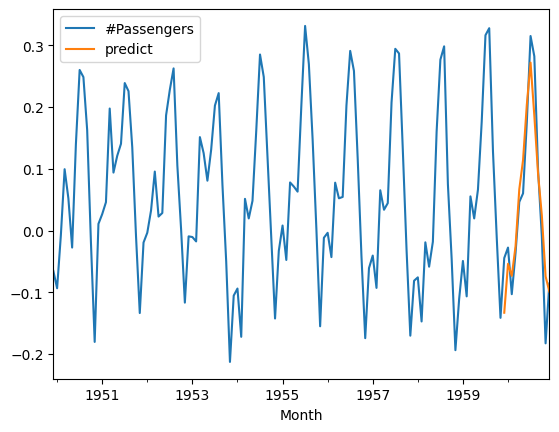

In [83]:
data_new[['#Passengers','predict']].plot()

In [90]:
data_new.tail(13)

,#Passengers,predict
Month,,
1959-12-01,-0.044481,-0.133096
1960-01-01,-0.027530,-0.053815
1960-02-01,-0.103067,-0.073379
1960-03-01,-0.036530,-0.025808
1960-04-01,0.046332,0.066803
1960-05-01,0.060186,0.114081
1960-06-01,0.175033,0.203459
1960-07-01,0.315151,0.272086
1960-08-01,0.282363,0.186447


<Axes: xlabel='Month'>

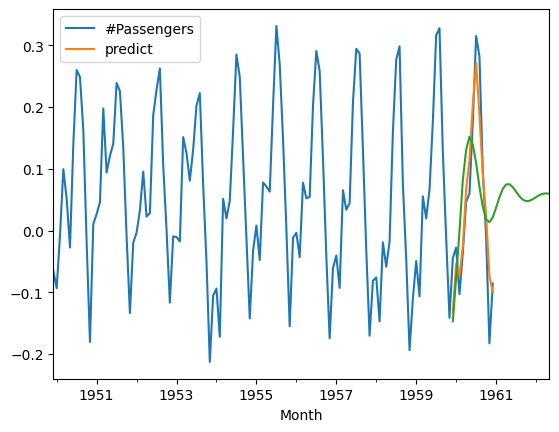

In [94]:
#data_new
forecast=model.forecast(steps=30)
data_new[['#Passengers','predict']].plot()
forecast.plot()

In [95]:
forecast

,predicted_mean
1959-12-01,-0.146949
1960-01-01,-0.076746
1960-02-01,-0.000990
1960-03-01,0.081470
1960-04-01,0.130487
1960-05-01,0.152208
1960-06-01,0.139388
1960-07-01,0.109448
1960-08-01,0.070729
1960-09-01,0.038605


<Axes: xlabel='Month'>

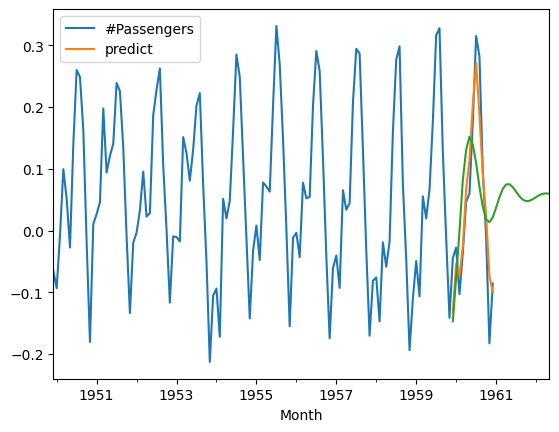

In [96]:
#new_data
forecast=model.forecast(steps=30)
new_data[['#Passengers','predict']].plot()
forecast.plot()

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [98]:
#model=SARIMAX(train,order=(7,1,7),seasonal_order=(7,1,7,4))